In [167]:
import pandas as pd
import numpy as np

In [168]:
df_RedditNews = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/RedditNews.csv')
df_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/upload_DJIA_table.csv')
df_Combined_News_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/Combined_News_DJIA.csv')

In [169]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

df_DJIA2 = df_DJIA.copy()
df_DJIA2[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']] = \
  scaler.fit_transform(df_DJIA2[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']])
  
df_DJIA2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,0.933579,0.940047,0.939734,0.938290,-0.778698,0.938290
1,2016-06-30,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995
2,2016-06-29,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995
3,2016-06-28,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554
4,2016-06-27,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745


In [170]:
df_Combined = df_DJIA2.copy()
for i in range(0,59):
  df_Combined[str(i+1)+" day before Open"] = ""
  df_Combined[str(i+1)+" day before High"] = ""
  df_Combined[str(i+1)+" day before Low"] = ""
  df_Combined[str(i+1)+" day before Close"] = ""
  df_Combined[str(i+1)+" day before Volume"] = ""
  df_Combined[str(i+1)+" day before Adj Close"] = ""

for i in range(0,25):
  df_Combined["Top"+str(i+1)] = ""

for j in range(0, df_DJIA2.shape[0]-59):
  for i in range(0, 59):
    df_Combined[str(i+1)+" day before Open"][j] = df_Combined["Open"][j+i+1]
    df_Combined[str(i+1)+" day before High"][j] = df_Combined["High"][j+i+1]
    df_Combined[str(i+1)+" day before Low"][j] = df_Combined["Low"][j+i+1]
    df_Combined[str(i+1)+" day before Close"][j] = df_Combined["Close"][j+i+1]
    df_Combined[str(i+1)+" day before Volume"][j] = df_Combined["Volume"][j+i+1]
    df_Combined[str(i+1)+" day before Adj Close"][j] = df_Combined["Adj Close"][j+i+1]

for i in range(0,25):
  df_Combined["Top"+str(i+1)] = ""

for i in range(0, df_DJIA2.shape[0]):
  News_Date_array = df_RedditNews[df_RedditNews["Date"] == df_Combined["Date"][i]]["News"].to_numpy()
  for j in range(0, News_Date_array.shape[0]):
    df_Combined["Top"+str(j+1)][i] = News_Date_array[j]

df_Combined = df_Combined[:-59]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipyk

In [5]:
df_Combined.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close,1 day before Open,1 day before High,1 day before Low,1 day before Close,1 day before Volume,1 day before Adj Close,2 day before Open,2 day before High,2 day before Low,2 day before Close,2 day before Volume,2 day before Adj Close,3 day before Open,3 day before High,3 day before Low,3 day before Close,3 day before Volume,3 day before Adj Close,4 day before Open,4 day before High,4 day before Low,4 day before Close,4 day before Volume,4 day before Adj Close,5 day before Open,5 day before High,5 day before Low,5 day before Close,5 day before Volume,5 day before Adj Close,6 day before Open,6 day before High,6 day before Low,...,57 day before Close,57 day before Volume,57 day before Adj Close,58 day before Open,58 day before High,58 day before Low,58 day before Close,58 day before Volume,58 day before Adj Close,59 day before Open,59 day before High,59 day before Low,59 day before Close,59 day before Volume,59 day before Adj Close,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2016-07-01,0.933579,0.940047,0.939734,0.938290,-0.778698,0.938290,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,...,0.899512,-0.782119,0.899512,0.876177,0.893533,0.878559,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",Switzerland denies Muslim girls citizenship af...,China kills millions of innocent meditators fo...,France Cracks Down on Factory Farms - A viral ...,Abbas PLO Faction Calls Killer of 13-Year-Old ...,Taiwanese warship accidentally fires missile t...,"Iran celebrates American Human Rights Week, mo...",U.N. panel moves to curb bias against L.G.B.T....,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...
1,2016-06-30,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,0.948778,-0.730957,0.948778,0.918017,0.925922,0.9149,...,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,0.893308,0.885914,0.866414,0.869034,-0.754812,0.869034,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,Afghan suicide bomber 'kills up to 40' - BBC News,US airstrikes kill at least 250 ISIS fighters ...,Turkish Cop Who Took Down Istanbul Gunman Hail...,Cannabis compounds could treat Alzheimer's by ...,Japan'

In [171]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sna = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [172]:
df_Combined2 = df_Combined.copy()
for i in range(0, df_Combined2.shape[0]):
  News_Date_array = df_RedditNews[df_RedditNews["Date"] == df_Combined2["Date"][i]]["News"].to_numpy()

  for j in range(0, 25):
    df_Combined2["Top"+str(j+1)][i] = sna.polarity_scores(df_Combined2["Top"+str(j+1)][i])["compound"]
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [173]:
from sklearn.model_selection import train_test_split

In [174]:
df_final = df_Combined2.drop(['Date', 'High', 'Low', 'Volume', 'Adj Close'], axis=1)
X_df = df_final.drop(['Close'], axis=1)
Y_df = df_final['Close']

In [10]:
df_final.head(2)

,Open,Close,1 day before Open,1 day before High,1 day before Low,1 day before Close,1 day before Volume,1 day before Adj Close,2 day before Open,2 day before High,2 day before Low,2 day before Close,2 day before Volume,2 day before Adj Close,3 day before Open,3 day before High,3 day before Low,3 day before Close,3 day before Volume,3 day before Adj Close,4 day before Open,4 day before High,4 day before Low,4 day before Close,4 day before Volume,4 day before Adj Close,5 day before Open,5 day before High,5 day before Low,5 day before Close,5 day before Volume,5 day before Adj Close,6 day before Open,6 day before High,6 day before Low,6 day before Close,6 day before Volume,6 day before Adj Close,7 day before Open,7 day before High,...,57 day before Close,57 day before Volume,57 day before Adj Close,58 day before Open,58 day before High,58 day before Low,58 day before Close,58 day before Volume,58 day before Adj Close,59 day before Open,59 day before High,59 day before Low,59 day before Close,59 day before Volume,59 day before Adj Close,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,0.933579,0.938290,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,0.948778,-0.730957,0.948778,0.918017,0.925922,...,0.899512,-0.782119,0.899512,0.876177,0.893533,0.878559,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,-0.5574,-0.0516,0.5719,-0.8658,-0.296,-0.4404,-0.3182,0.5612,-0.7351,-0.2732,-0.8402,-0.6486,-0.4767,0.1779,-0.1027,-0.5859,0.3818,0,-0.4019,-0.3182,-0.9509,-0.3818,-0.9618,-0.9432,0
1,0.897638,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,0.948778,-0.730957,0.948778,0.918017,0.925922,0.9149,0.90964,-0.756853,0.90964,0.917109,0.918651,...,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,0.893308,0.885914,0.866414,0.869034,-0.754812,0.869034,0,-0.4141,0.4019,-0.8934,-0.6124,-0.91,-0.3612,0.7003,-0.8402,-0.7096,0.6705,0.4019,-0.5423,0,-0.3182,0.7351,0,-0.7579,-0.3182,0,-0.9578,0,-0.872,-0.5423,-0.875


In [175]:
x_train, x_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=1)
import tensorflow as tf

In [12]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

In [141]:
y_train = np.array(y_train,ndmin=2)

In [14]:
features = x_train.shape[1]
x = tf.placeholder(tf.float32, shape=[x_train.shape[0],x_train.shape[1]])
y_ = tf.placeholder(tf.float32, shape=[y_train.shape[0],y_train.shape[1]])
W = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros([1]))
predict = tf.matmul(x,W) + b
loss = tf.reduce_mean(tf.pow(predict - y_, 2))
update = tf.train.GradientDescentOptimizer(0.005).minimize(loss)
data_x = x_train.to_numpy()
data_y = y_train

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
for i in range(0,5000):
    sess.run(update, feed_dict = {x:data_x, y_:data_y})
    # if i+1 % 10 == 0 :
    #     print('Iteration:' , i+1 , ' W(1->5):' , sess.run(W[0:5]) , ' b:' , sess.run(b), ' loss:', loss.eval(session=sess, feed_dict = {x:data_x, y_:data_y}))

In [ ]:
y_test = np.array(y_test, ndmin=2)
x_test_p = tf.placeholder(tf.float32, shape=[x_test.shape[0],x_test.shape[1]])
y_test_p = tf.placeholder(tf.float32, shape=[y_test.shape[0],y_test.shape[1]])
predict = tf.matmul(x_test_p,W) + b
loss = tf.reduce_mean(tf.pow(predict - y_test_p, 2))

In [ ]:
sess.run(predict, feed_dict = {x_test_p: data_x, y_test_p: data_y})

In [153]:
y_train

1361   -0.062465
1041    0.066446
198     0.672290
460     0.788734
159     0.853073
          ...   
905     0.076226
1791   -0.703352
1096    0.094340
235     0.884046
1061    0.071374
Name: Close, Length: 1351, dtype: float64

In [182]:
x_train, x_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=1)

In [183]:
# https://stackoverflow.com/questions/40994583/how-to-implement-tensorflows-next-batch-for-own-data
def next_batch(num, data, labels):
    data['y'] = labels
    data = data.sample(num)
    data_shuffle = data.sample(num)
    labels_shuffle = np.array(data['y'], ndmin=2)
    return np.asarray(data_shuffle), np.asarray(labels_shuffle).reshape((data.shape[0], 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [212]:
batch_size = 579
step_size = 0.0001
(hidden1_size, hidden2_size, hidden3_size, hidden4_size) = (100, 30, 10, 10)

x = tf.placeholder(tf.float32, shape=[batch_size, x_train.shape[1]])
y_ = tf.placeholder(tf.float32, shape=[batch_size, 1])

W1 = tf.Variable(tf.truncated_normal([x_train.shape[1], hidden1_size], stddev=0.1))
b1 = tf.Variable(tf.constant(0.01, shape=[hidden1_size]))
z1 = tf.nn.relu(tf.matmul(x,W1)+b1)

# W2 = tf.Variable(tf.truncated_normal([hidden1_size, 1], stddev=0.1))
# b2 = tf.Variable(tf.constant(0.1, shape=[1]))
W2 = tf.Variable(tf.truncated_normal([hidden1_size, hidden2_size], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[hidden2_size]))
z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)

# W3 = tf.Variable(tf.truncated_normal([hidden2_size, 1], stddev=0.1))
# b3 = tf.Variable(tf.constant(0.1, shape=[1]))
W3 = tf.Variable(tf.truncated_normal([hidden2_size, hidden3_size], stddev=0.1))
b3 = tf.Variable(tf.constant(0.01, shape=[hidden3_size]))
z3 = tf.nn.relu(tf.matmul(z2,W3)+b3)

W4 = tf.Variable(tf.truncated_normal([hidden3_size, 1], stddev=0.1))
b4 = tf.Variable(tf.constant(0.01, shape=[1]))
# W4 = tf.Variable(tf.truncated_normal([hidden3_size, hidden4_size], stddev=0.1))
# b4 = tf.Variable(tf.constant(0.01, shape=[hidden4_size]))
# z4 = tf.nn.relu(tf.matmul(z3,W4)+b4)

# W5 = tf.Variable(tf.truncated_normal([hidden4_size, 1], stddev=0.1))
# b5 = tf.Variable(tf.constant(0.01, shape=[1]))

# predict = tf.matmul(z4,W5) + b5
predict = tf.matmul(z3,W4) + b4
# predict = tf.matmul(z2,W3) + b3
# predict = tf.matmul(z1,W2) + b2

loss = tf.reduce_mean(tf.pow(predict - y_, 2))
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
losses = []
for i in range (100):
    for _ in range(200):
      batch_xn, batch_yn = next_batch(batch_size, x_train, y_train)
      sess.run(train_step, feed_dict={x: batch_xn, y_: batch_yn})
    batch_xt, batch_yt = next_batch(batch_size, x_test, y_test)
    temp_loss = sess.run(loss, feed_dict={x: batch_xt, y_: batch_yt})
    losses.append(temp_loss)
    print('iter', i+1, temp_loss)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


iter 1 0.31626788
iter 2 0.308947
iter 3 0.30614495
iter 4 0.30234772
iter 5 0.29860726
iter 6 0.29565147
iter 7 0.29376858
iter 8 0.29158425
iter 9 0.2902731
iter 10 0.28739586
iter 11 0.28639278
iter 12 0.28879791
iter 13 0.28756714
iter 14 0.28640714
iter 15 0.2845995
iter 16 0.28611043
iter 17 0.28252074
iter 18 0.28418127
iter 19 0.28325722
iter 20 0.28485438
iter 21 0.28505823
iter 22 0.28389657
iter 23 0.28457174
iter 24 0.28236422
iter 25 0.2857467
iter 26 0.2809844
iter 27 0.28478497
iter 28 0.28479162
iter 29 0.2826166
iter 30 0.28028852
iter 31 0.2813049
iter 32 0.28351578
iter 33 0.28546736
iter 34 0.2843121
iter 35 0.28517142
iter 36 0.2827511
iter 37 0.28253174
iter 38 0.28165716
iter 39 0.28030884
iter 40 0.28128746
iter 41 0.28310668
iter 42 0.2810464
iter 43 0.2818969
iter 44 0.2845999
iter 45 0.28378007
iter 46 0.2807476
iter 47 0.2825578
iter 48 0.28345874
iter 49 0.28221482
iter 50 0.28283682
iter 51 0.2823332
iter 52 0.28274617
iter 53 0.28378618
iter 54 0.2822102


In [202]:
import matplotlib.pyplot as plt
%matplotlib inline

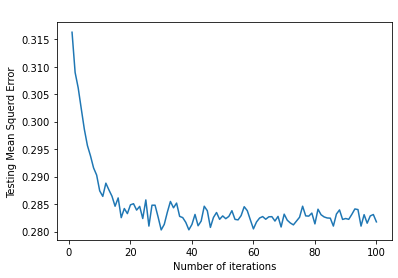

In [213]:
iter = np.arange(1,101)
plt.title(' ')
plt.plot(iter, losses)
# plt.plot(estimators, train_accuracy, label='Training accuracy')
# plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Testing Mean Squerd Error')
plt.show()